<a href="https://colab.research.google.com/github/queersweetpotato/atlantechAI/blob/main/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/queersweetpotato/atlantechAI.git

fatal: destination path 'atlantechAI' already exists and is not an empty directory.


### Testing the use of SHaP for ML data interpretation

In [22]:
import shap

In [24]:
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
#from numpy import asarray
from numpy import absolute
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#fetch dataset and split it into training and label data
data = fetch_openml(data_id=45949)

#the dataset does not have a defined target column, hence I have decided to use death event
y = data['data']['DEATH_EVENT']
#need to delete final column from the data bit
del data['data']['DEATH_EVENT']
X = data['data']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X)

#define model
#model = XGBRFRegressor(eval_metric='rmsle')
#model = XGBRFRegressor()
model = XGBRFRegressor(eval_metric='rmsle', learning_rate= 0.7, max_depth= 12, n_estimators= 50)

#find the best hyper parameters

"""
#set up our search grid
param_grid = {"max_depth":    [4, 6, 10, 12],
              "n_estimators": [50, 100, 200, 300],
              "learning_rate": [0.1, 0.3, 0.5, 0.7]}

# try out every combination of the above values
search = GridSearchCV(model, param_grid, refit=True, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

#evaluate the model

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
"""

#train the model
model.fit(X_train, y_train)

#predict
preds = model.predict(X_test)
print(preds)
print(y_test)

#save the model for future use
model.save_model("heartFailure.ubj")

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     55.0      0.0                     748.0       0.0               45.0   
1     65.0      0.0                      56.0       0.0               25.0   
2     45.0      0.0                     582.0       1.0               38.0   
3     60.0      1.0                     754.0       1.0               40.0   
4     95.0      1.0                     582.0       0.0               30.0   
...    ...      ...                       ...       ...                ...   
4995  45.0      0.0                     582.0       1.0               55.0   
4996  60.0      1.0                     582.0       0.0               30.0   
4997  95.0      1.0                     112.0       0.0               40.0   
4998  65.0      1.0                     160.0       1.0               20.0   
4999  40.0      0.0                     244.0       0.0               45.0   

      high_blood_pressure  platelets  serum_creatinine  serum_s

In [25]:
# XGBoost imports
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Obtaining data for the model

#fetch dataset and split it into training and label data
data = fetch_openml(data_id=45949)

#the dataset does not have a defined target column, hence I have decided to use death event
y = data['data']['DEATH_EVENT']
#need to delete final column from the data bit
del data['data']['DEATH_EVENT']
X = data['data']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Loading a saved model
model = XGBRFRegressor()
model.load_model("heartFailure.ubj");

# Predicting the test dataset using the loaded model
preds = model.predict(X_test)
print(preds)
print(y_test)


[0.09469922 0.09440354 0.7943193  ... 0.0947264  0.5923932  0.09981887]
755     0.0
4902    0.0
3616    1.0
1551    1.0
1422    0.0
       ... 
4843    1.0
175     0.0
3838    0.0
934     1.0
3982    0.0
Name: DEATH_EVENT, Length: 1250, dtype: float64


/usr/local/lib/python3.11/dist-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 3 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/shap/utils/_clustering.py:170: UserWarning: No/low signal found from feature 10 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all redundancy distances to 1).
  warnings.warn(


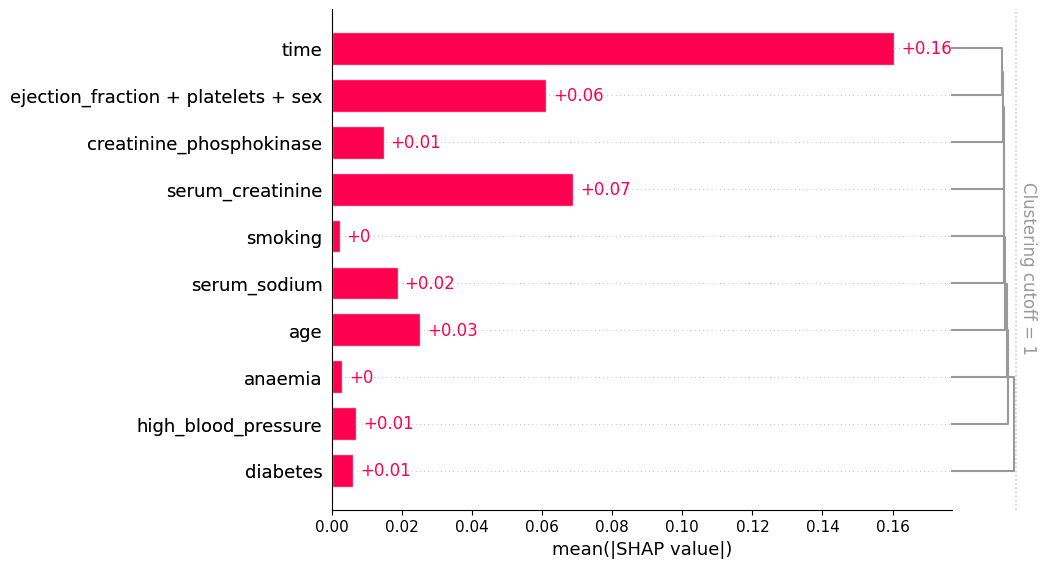

In [29]:
#runs the explainer on the trained model
explainer = shap.Explainer(model)
shap_values = explainer(X)

#runs clustering
clust = shap.utils.hclust(X, y, linkage="single")

#plots the bar chart of the shap values
shap.plots.bar(shap_values, clustering=clust, clustering_cutoff=1)

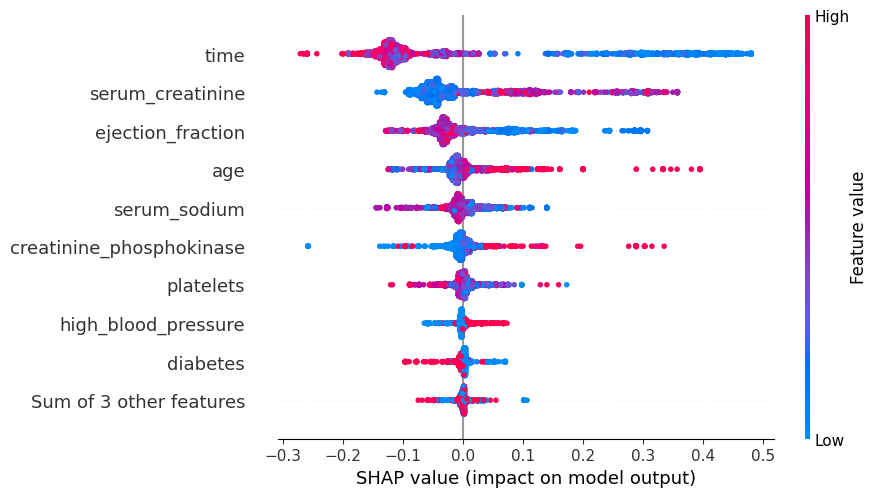

In [28]:
#beewswarm plot of shap values. shows accurately how changes in the attributes changes the prediction

shap.plots.beeswarm(shap_values)